In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [4]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving beer_reviews_cleaned.csv to beer_reviews_cleaned.csv


In [5]:
df = pd.read_csv('beer_reviews_cleaned.csv')
df

,BREWERY_NAME,CITY,STATE,STYLE,ABV,IBU,SIZE__OZ__,REVIEW_OVERALL
0,21st Amendment Brewery,San Francisco,CA,American IPA,0.070,70.0,12,4.0
1,21st Amendment Brewery,San Francisco,CA,Belgian Dark Ale,0.083,35.0,12,4.0
2,21st Amendment Brewery,San Francisco,CA,Belgian Dark Ale,0.083,35.0,12,4.0
3,21st Amendment Brewery,San Francisco,CA,Fruit / Vegetable Beer,0.049,17.0,12,4.5
4,21st Amendment Brewery,San Francisco,CA,American Pale Ale (APA),0.044,42.0,12,3.5
...,...,...,...,...,...,...,...,...
114694,Troegs Brewing Company,Hershey,PA,American Amber / Red Ale,0.075,93.0,16,4.0
114695,Troegs Brewing Company,Hershey,PA,American Amber / Red Ale,0.075,93.0,16,4.0
114696,Troegs Brewing Company,Hershey,PA,American Amber / Red Ale,0.075,93.0,16,4.5
114697,Troegs Brewing Company,Hershey,PA,American Amber / Red Ale,0.075,93.0,16,4.0


In [6]:
# OVERALL_REVIEW greater than 4.0 means our beer is successful.
# Transforming reviews greater than 4.0 into integers.
df1 = df.copy()
df1['REVIEW_OVERALL']= (df['REVIEW_OVERALL'] >= 4.0).astype(int)
print(df1.head(5))

             BREWERY_NAME           CITY  ... SIZE__OZ__ REVIEW_OVERALL
0  21st Amendment Brewery  San Francisco  ...         12              1
1  21st Amendment Brewery  San Francisco  ...         12              1
2  21st Amendment Brewery  San Francisco  ...         12              1
3  21st Amendment Brewery  San Francisco  ...         12              1
4  21st Amendment Brewery  San Francisco  ...         12              0

[5 rows x 8 columns]


In [7]:
# Separating all the variables into two lists for future column indexing
# One for numerical, the other for categorical 
cvar_list = ['BREWERY_NAME', 'CITY', 'STATE', 'STYLE', 'REVIEW_OVERALL']
nvar_list = ['ABV', 'IBU','SIZE__OZ__']

In [8]:
# Part: Variable Transformation
# Standardizing the numerical variables
df2 = df1.copy()
df2[nvar_list] = (df1[nvar_list] - df1[nvar_list].mean())/df1[nvar_list].std()

In [9]:
# Setting the datatype for the variables in the cvar_list to be categorical
# Setting the datatype for the variables in the nvar_list to be numerical
df3 = df2.copy()
df3[cvar_list] = df2[cvar_list].astype('category')
df3[nvar_list] = df2[nvar_list].astype('float64')

In [10]:
# Converting the categorical variables into dummies
df4 = df3.copy()
df4 = pd.get_dummies(df3, prefix_sep='_', drop_first=True)

print(df4.columns.values.shape)

(635,)


In [11]:
# Part: Data Partiton
df5 = df4.copy()

# the independent columns
#feature_columns:
x = df5.iloc[:, :-1].values # select till the second last column of the data frame instead of the last column
# the dependent column
y = df5.iloc[:, -1].values # select all row vector of the last column's values

In [12]:
print(x)
print(y)

[[ 0.51074616  1.02485649 -0.58279553 ...  0.          0.
   0.        ]
 [ 1.33750019 -0.45740056 -0.58279553 ...  0.          0.
   0.        ]
 [ 1.33750019 -0.45740056 -0.58279553 ...  0.          0.
   0.        ]
 ...
 [ 0.82872848  1.99891113  1.4196778  ...  0.          0.
   0.        ]
 [ 0.82872848  1.99891113  1.4196778  ...  0.          0.
   0.        ]
 [ 0.82872848  1.99891113  1.4196778  ...  0.          0.
   0.        ]]
[1 1 1 ... 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn import metrics
cfn_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cfn_matrix)

[[ 2488  4973]
 [ 1577 13902]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


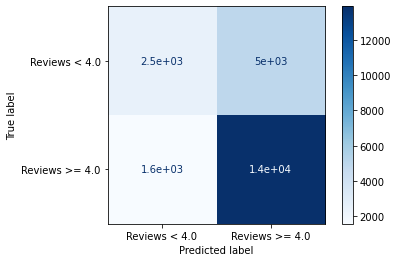

In [15]:
class_names=['Reviews < 4.0','Reviews >= 4.0']
disp = plot_confusion_matrix(model, x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)